# 2 Grafos

# 2.1 Concepto y primeras definiciones

## Indice

* [Librerías](#Librerías)

* [Grafos y diagrafos](#Grafos-y-digrafos)

* [Definiciones complementarias](#Definiciones-complementarias)

* [Algunos grafos particulares](#Algunos-grafos-particulares)

* [Grado](#Grado)

* [Grafos bipartidos. Emparejamientos](#Grafos-bipartidos.-Emparejamientos)



## Librerías

In [12]:
%matplotlib inline
#sci py libraries
import numpy as np
import scipy as sp
import scipy.linalg as la
#abstract graphs libraries
import networkx as nx
import random
#ploting and drawing libraries:
from nxpd import draw
from IPython.display import Image
import scipy.integrate as sint
import matplotlib.pyplot as plt


## Grafos y digrafos

Grafo(no dirigido). Se llama grafo a todo par $\ G = (V, E) $ donde:

* $\ V \ \ !=  \emptyset $ es un conjunto finito a cuyos elementos se les llama **vertices(o nudos)**
* $\ E $ es un conjunto de parejas(pares no ordenados) de vertices de V; a los elementos de E se les llama **aristas**(o lados).
* La E con la que se denota al conjunto de las **aritstas**


**Ejemplo de grafo:**

$\ G =  \text{ e1(v1,v4) = (v4,v1), e2(v2,v3) = (v3,v2), e3(v2,v6) = (v6,v2), e4(v3,v6) = (v6,v3), e5(v4,v5) = (v5,v4)} $

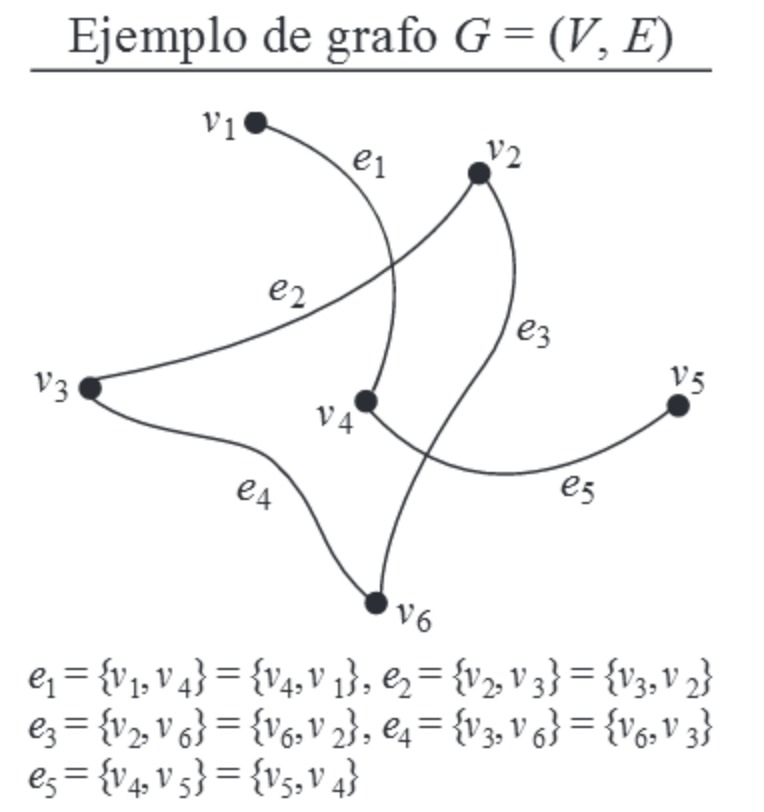

In [3]:
Image(filename='EjemploGrafo.jpeg', width=250, height=200)

* Una **arista** la representaremos mediante un par de vértices encerrados entre llaves.                 
  El grafo sólo tine aristas se dice que es **no dirigido**(GND) por ejemplo:

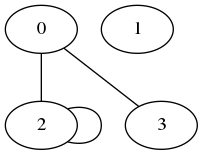

In [4]:
G=np.array
G = np.array([[0,0,2,1],
              [0,0,0,0],
              [2,0,2,0],
              [1,0,0,0]])

G = nx.from_numpy_matrix(G)
draw(G, show='ipynb')

* Un **arco** lo representaremos mediante un par de vértices encerrados entre paréntesis.    
  Si el grafo sólo tiene arcos se dice que es **dirigido**(GD)

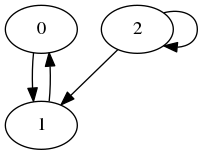

In [5]:
G = nx.DiGraph()
G.add_edges_from([(0,1), (2,1), (1,0), (2,1),(2,2)])
draw(G, show='ipynb')



* Si en el grafo aparecen tanto arístas como arcos tendremos un **grafo mixto**.     
  El grafo G3 es un grafo mixto con V={x,y,z}, E={e1=(x,y),e2=(x,z),e3={z,y}}    
  Todo grafo que tenga aroc tiene un GND **asociado** que tiene el mismo conjunto de vértices pero los arcos pasan a ser   arístas
  Por ejemplo el grafo asociado al grafo G3 es G3' = (V',E'),donde V'={x,y,z}, E'={e1=(x,y),e2={x,z},e5={z,y}}

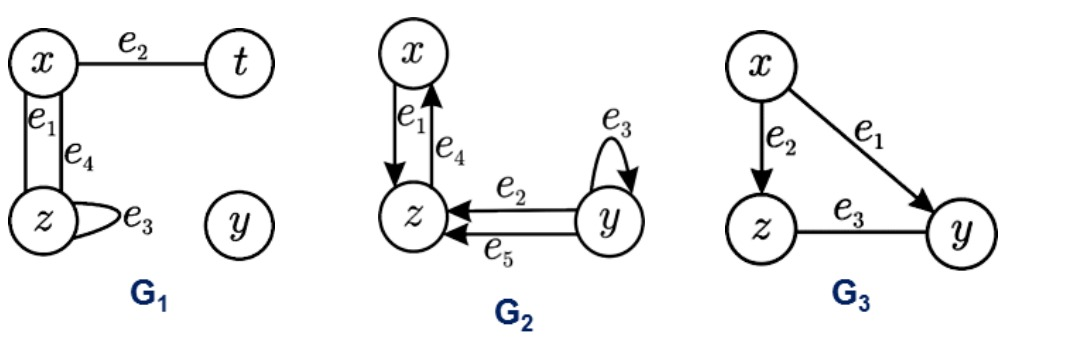

In [6]:
Image(filename='GrafosEjemplo.jpeg', width=550, height=350)

* Sea un grafo G=(V,E):
 * Una arista/arco que une dos vértices se dice que **incide** en ellos. Estos vértices son los **extremos** de dicha arista/arco.
 * Dos vértices son **adyancentes** si están unidos por una arista/arco
 * Un **bucle** es una arista/arco que relaciona al mismo vértice  
**Ejemplo:**  
     En la arista e1={x,z}, los vértices x,z son los extremos de la arista e1, dichos vértices son adyacentes.  
     En el arco e2= (y,z), el vértice y es el vértice inicial del arco y el vértice z el final del arco, dichos vértices son adyacentes.
  * Las aristas/arcos pueden llevar asociado un **coste o peso** que llamaremos peso de la arista/arco  
     Def. Para v є V, se define el conjunto de **vértices adyancestes** a v como:  
     En un GND,Γ(v)={u є V / {u,v} є E}  
     En un GD,Γ(v)={u є V / {v,u} є E}  y Γ(v)={u є V / {u,v} є E}  Γ^-1(v)={u є V / {u,v} є E}  
     Def. En un GND, el **grado de un vértice **(d(v)) es el número de arcos incidentes en él. Para ello se consideran los arcos que salen y entran en el vértice. El bucle cuneta como arco que sale y entra.  
     Ejemplo: En el grafo G1, d(x)=3, d(y)=0, d(z)=4  
     Def. En un GD, **el grado de un vértice** es el número de arcos incidentes en él. Para ello se consideran los arcos que salen y entran en el vértice. El bucle cuenta como arco que sale y entra.  
     **Grado de salida** de v, ds(v) es el número de arcos que salen de v.  
     **Grado de entrada** de v, de(v) es el número de arcos que entran(acabado)en v.  
     Ejemplo. En el grafo G2, E={e1=(x,z),e2=(y,z),e3(y,y),e4=(z,x),e5(y,z)}  
     ds(x)=1, de(x)=1, luego d(x)=2  
     ds(y)=3, de(y)=1, luegod(y)=4
     
     
     
     
     
  

**Adyacencia en grafos:**
   * **1º) Vertices adyacentes** Si {u,v}={v,u} es una arista de un grafo, entonces se dice que los vértices u y v son adyacentes, que {u,v} une a los vértices u y v, que u y v son los extremos de (u,v). En ocaciones, se pone uv o vu en lugar de {u,v}.  
   * **2º) Aristas adyacentes** Dos aristas se dicen adyacentes si tiene un(sólo un) extremo en común.    
       **Digrafo**(o grafo dirigido). Se llama digrafo a todo par G=(V,E) donde :
        * V ≠Ø es un conjunto finito a cuyos elementos se les llama vértices(o nudos).  
        * E es un conjunto de pares ordenados de vértices de V; a lo selementos de E se les llama arcos.

**Adyacencia en digrafos**
   * **1º) Vértices adyacentes** Si (u,v) es un arco de un digrafo entonces se dice que los vétices u y v son adyacentes, que (u,v) une a u con v, que u es el origen y v el extremo de (u,v).  
   En ocaciones se pone uv en lugar de (u,v).
   * **2º Arco adyacentes** Dos arcos se dicen adyacentes si el extremo de uno de ellos es el origen del siguiente.
   

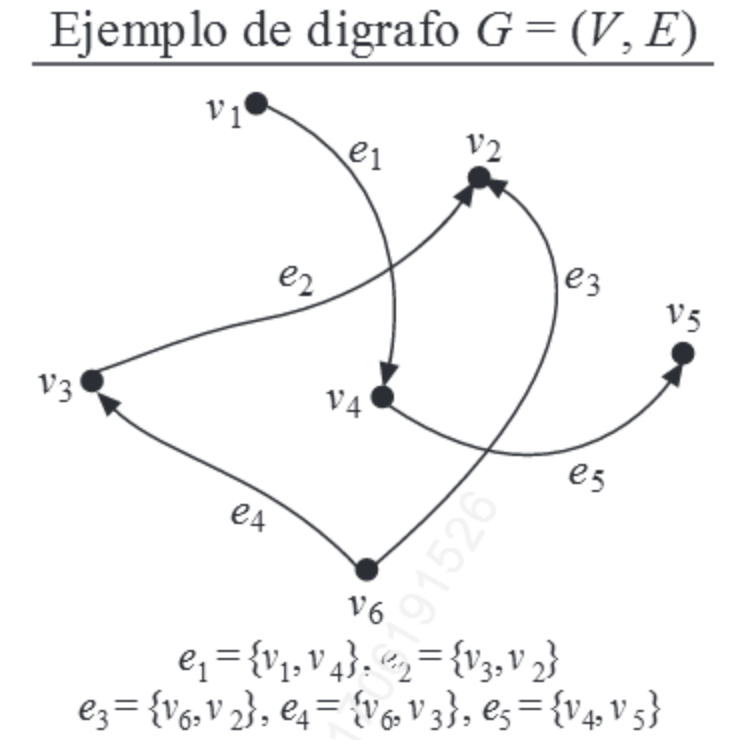

In [7]:
Image(filename='Digrafo.png', width=250, height=200)

## Definiciones complementarias

* **Nudo aislado**. En un grafo o en un digrafo, se dice que vértice es aislado si no está unido a ningún otro vértices

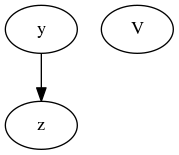

In [8]:
G = nx.DiGraph()
G.add_node('V')
G.add_node('z')
G.add_node('y')
G.add_edge('y','z')
draw(G, show='ipynb')

* **Adyacencia de un conjunto de vértices** Si U C V es un conjunto de vértices de un grafo o un digrafo G=(V,E), se llama adyacencia de U al conjunto de los vértices de V - U que son adyacentes a los vértices de U

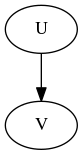

In [9]:
G = nx.DiGraph()
G.add_node('U')
G.add_node('V')
G.add_edge('U','V')
draw(G, show='ipynb')

* **Bucle(o lazos)** En un grafo o un digrafo, una arista o un arco se dice que es un bucle si une un vértice consigo mismo.

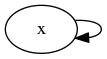

In [10]:
G = nx.DiGraph()
G.add_node('x')
G.add_edge('x','x')
draw(G, show='ipynb')

* **Grafo simple** Un grafo o un digrafo se dice que es simple si no tiene bucles

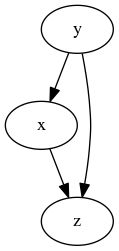

In [11]:
G = nx.DiGraph()
G.add_node('x')
G.add_node('z')
G.add_node('y')
G.add_edge('x','z')
G.add_edge('y','z')
G.add_edge('y','x')
draw(G, show='ipynb')

* **Aristas múltipes**(o paralelas). Si dos vértices de un grafo o de un digrafo, están unidos por más de una arista o arco, se dirá que las tales aristas o los tales arcos forman una arista o un arco múltiple

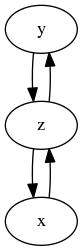

In [192]:
G = nx.DiGraph()
G.add_node('x')
G.add_node('z')
G.add_node('y')
G.add_edge('x','z')
G.add_edge('z','x')
G.add_edge('y','z')
G.add_edge('z','y')
draw(G, show='ipynb')

* **Multigrafos**(o pseudografos). Si en un grafo o en un digrafo se admite que algunas de sus arista o algunos de sus arcos sea múltiple, de él se dirá que es un multigrafo o un multidigrafo

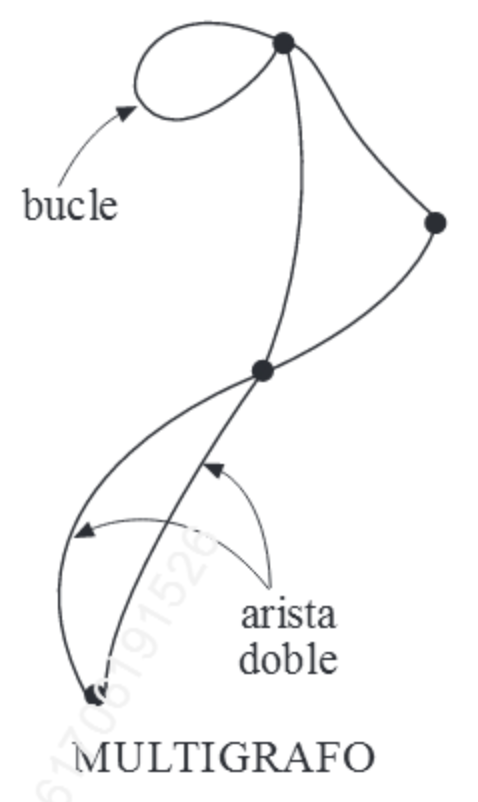

In [271]:
Image(filename='Multigrafo.png', width=200, height=200)

* **Grafos ponderados**(o etiquetados o valorados). Un grafo(o un digrafo) ponderado es un grafo(o un digrafo) en el que a cada arista(o arco) se le asigna un número real positivo que se llama peso, valoración, longitud o coste de la arista(o arco). Se llama peso de un grafo ponderado a la suma de los pesos de todas sus aristas(o arco).

{(1, 2): <matplotlib.text.Text at 0x7f67e5f7de10>,
 (1, 3): <matplotlib.text.Text at 0x7f67e6ca3310>,
 (2, 3): <matplotlib.text.Text at 0x7f67e6ca1b90>}

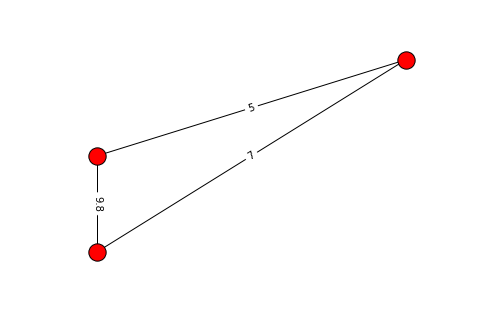

In [194]:
G=nx.Graph()
G.add_node(1,pos=(1,1))
G.add_node(2,pos=(2,2))
G.add_node(3,pos=(1,0))
G.add_edge(1,3,weight=9.8)
G.add_edge(2,1,weight=5)
G.add_edge(3,2,weight=7)
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

* **Isomorfismo de grafos**. Dos grafos simples. $\ G_1$= ($\ V_1$,$\ E_1$) y $\ G_2$($\ V_2$,$\ E_2$), se dicen isomorofs si existe una función f: $\ V_1$ -> $\ V_2$ tal que:   
  **1º)** es biyectiva  
  **2º)** dos vertices u,v є $\ V_1$ son adyacentes en $\ G_1$ si , sólo si, los vertices f(u) y f(v), de $\ V_2$, son adyacentes en $\ G_2$. En tal caso, se dice que f es un isomorfismo de grafos, entre los grafos $\ G_1$ y $\ G_2$.

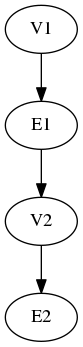

In [195]:
G1 = nx.DiGraph()
G1.add_path(['V1','E1','V2','E2'],weight=1)
draw(G1, show='ipynb')

## Algunos grafos particulares

* **Grafos completos**. Un grafo (no digrafo) se dice que es completo si:  
  1º) es simple(carece de bucles); y   
  2º) cada uno de sus vértices es adyacente con todos los demás. Todos los grafos completos de n vértices, los cuales son isomorofs entre sí, tienen n(n+1)/2 vértices; para designarlos se acude a poner $\ k_n $.

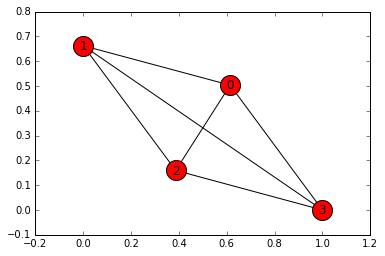

In [196]:
G5 = nx.complete_graph(4)
nx.draw_networkx(G5, node_color='r', node_size=400)

* **GND es simple** si no tiene bucles ni aristas multipes entre dos vértices. **GD es simple** si no tiene bucles y no hay más de dos arcoes en el mismo sentido uniendo el mismo para de vértices. Si un grafo no es sipme es un **multigrafo**
   * Casos particulares de grafos simples:
      * Si G tiene **|E|=0, |V|** > 1, el grafo es **vacío**. Será simple pero no completo.
      * **Si** G tiene **|E|=0, |V|**=1, el grafo es **trivial**. Será simple y completo.  
**Ejemplos de grafos simples. El 1º es vacío y el 2º triviial. El 3º es simple pero no vacio ni trivial**:

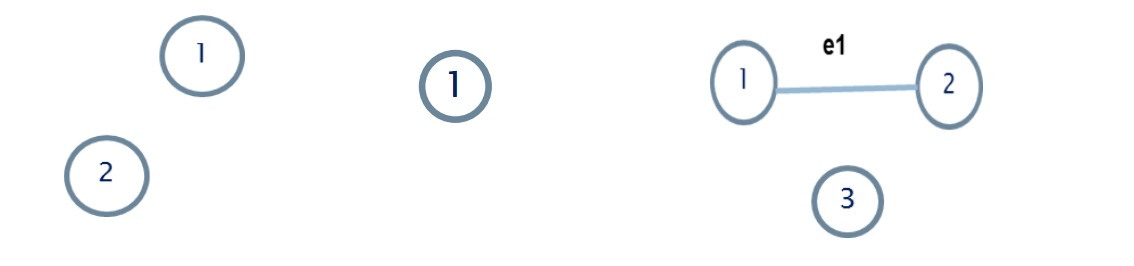

In [326]:
Image(filename='Grafo simple.jpeg', width=550, height=350)

* **Digrafos completos**(o torneos). Son los digrafos simples, G=(V,E), en los que, para cada par de vértices distintos u,v є V, acontece que uno de los pares (u,v) o (v,u) es una arista de E; esto es, si un **grafo subyacentes** es un grafo   completo. Por  $\ k^*_n $ se representa a un digrafo completo de n vértices

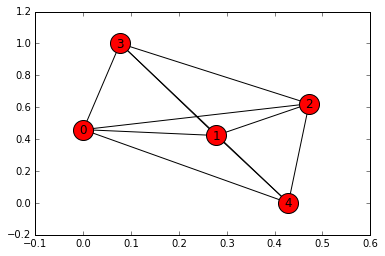

In [201]:
G5 = nx.complete_graph(5)
nx.draw_networkx(G5, node_color='r', node_size=400)

* **Grafo lineal  $\ L_n $ **(de n vértices). Es un grafo G=(V,E) en el que, si V={ $\ v_1,v_2,$...,$\ v_n$}, $\ v_1$ es adyacente sólo a $\ v_2$, $\ v_1$ es adyacente a $\ v_i-_j$ y a $\ v_i-_1$ (i=2,...,n-1) y $\ v_n$ es adyacente solo a $\ v_n-_1$.

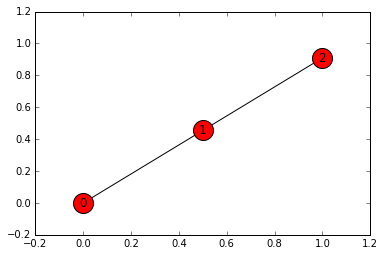

In [199]:
G5 = nx.path_graph(3)
nx.draw_networkx(G5, node_color='r', node_size=400)

* **Grafo circular Cn**(de n vértices). Es un grafo G=(V,E) en el que, si V={$\ v_1,v_2$....,$\ v_n$}, $\ v_1$ es adyacente a $\ v_n$ y $\ v_2$, $\ v_1$ es adyacente a $\ v_i-_1$ y a $\ v_i-_1$(i=2,...n-1) y vn es adyacente a $\ v_1$ y $\ v_n-_1$

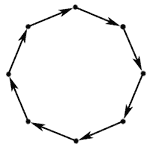

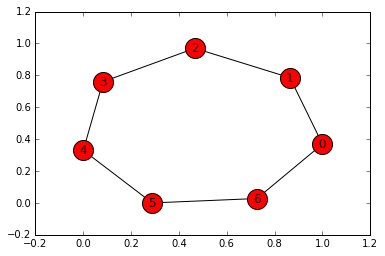

In [230]:
G5 = nx.cycle_graph(7)
nx.draw_networkx(G5, node_color='r', node_size=400)
Image(filename='Grafo circular.png')

* **Grafo vacío** $\ N_n$(de n vértices). Es un grafo G=(V,E) en el que |V|= n y E=Ø (sus n vértices son aislados).

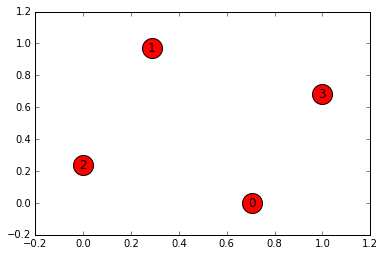

In [231]:
G5 = nx.empty_graph(4)
nx.draw_networkx(G5, node_color='r', node_size=400)

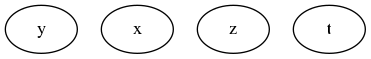

In [237]:
G = nx.DiGraph()
G.add_node('x')
G.add_node('z')
G.add_node('y')
G.add_node('t')
draw(G, show='ipynb')

* **Grafo regular**. Un grafo G=(V,E) se dice que es regular de grado k si acontece que todo vértice v є V es adyacente a k vértices de V.   
 En tal caso, entre el número de vértices, |V|, y el número de aristas,|E|, se verifica la relación 2|E| = K|V|

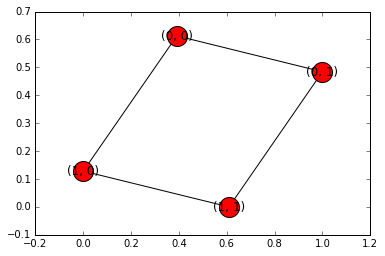

In [238]:
G5 = nx.hypercube_graph(2)
nx.draw_networkx(G5, node_color='r', node_size=400)

* **Cubo Qn**. Este es el grafo G=(V,E) en el que:  
 1º) los vértices son todas las n-uplas($\ x_1,x_2$,...,$\ x_n$) Є $\ N^n$ cuyas componentes son 0 o 1; asi pues, el numero de vertices es |V| = 2ⁿ. Y 2.) dos vértices son adyacentes si, salvo una, sus demás componentes son respectivamente iguales; así pues, cada vértice es adyacente a otro n vértices. El número de arista de Qn es |E| = $\ n2^n-^1$. $\ Q_n$ es un grafo regular.

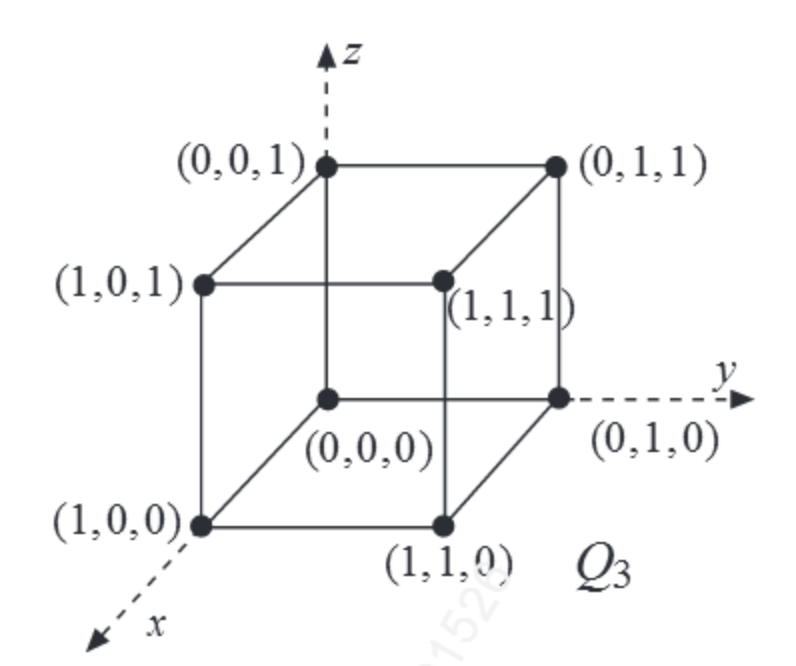

In [279]:
Image(filename='cubo.png', width=250, height=250)

* **Grafos platónicos**. Son los cinco grafos representados a continuación, asociados a los cinco poliedros regulares(sólidos platonicos).

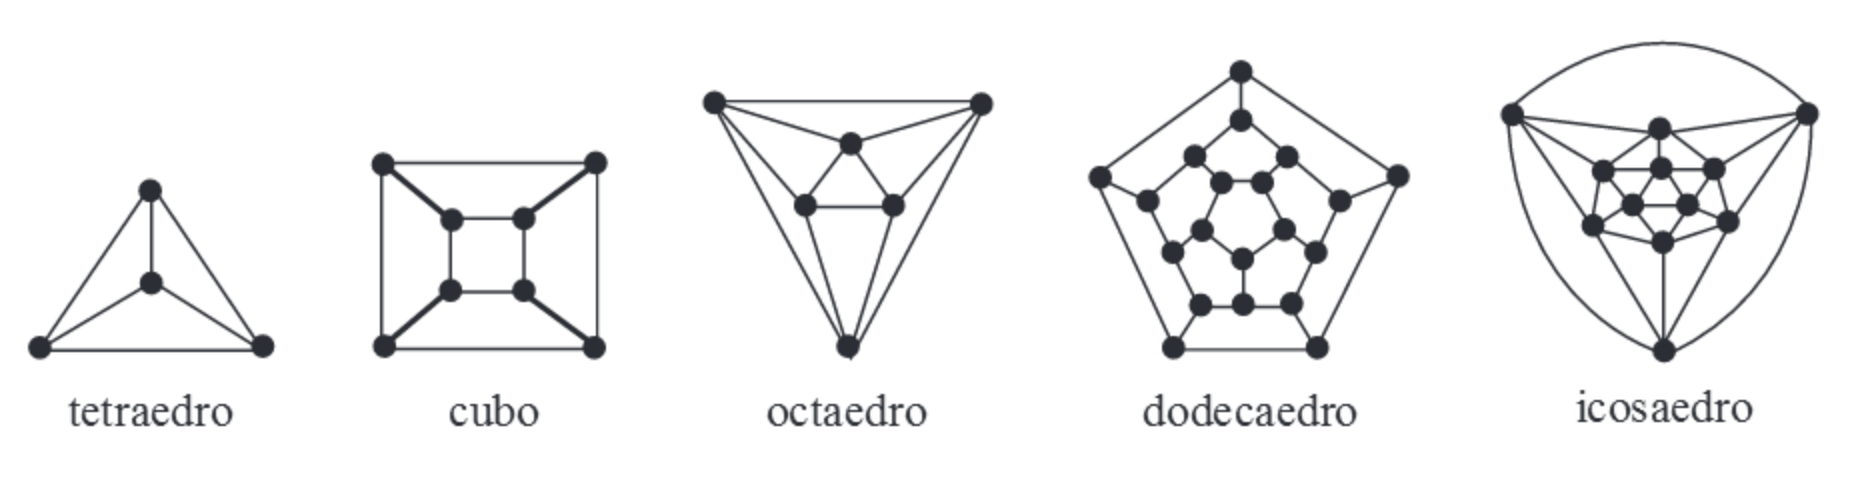

In [240]:
Image(filename='grafos platonicos.png')

## Grado

* **Grado(o valencia) de un vértice.** Sea v un vértice que un frafo, un digrafo o un multigrafo G=(V,E). Se llama grado de v, gr(v), al número de aristas de E que inciden en v.


	 El grado del nodo 0 es 2
	 El grado del nodo 1 es 0
	 El grado del nodo 2 es 3
	 El grado del nodo 3 es 1


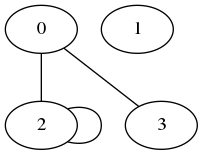

In [248]:
Adj = np.array([[0, 0, 2, 1], 
                [0, 0, 0, 0],
                [2, 0, 2, 0],
                [1, 0, 0, 0]
               ])
G1 = nx.from_numpy_matrix(Adj)

print "\n\t El grado del nodo 0 es " + str(G1.degree(0))
print "\t El grado del nodo 1 es " + str(G1.degree(1))
print "\t El grado del nodo 2 es " + str(G1.degree(2))
print "\t El grado del nodo 3 es " + str(G1.degree(3))

draw(G1, show='ipynb')

* **Grado de un grafo** Dado G=(V,E), grafo, digrafo o multigrafo, se llama grado de G, gr(G), a la suma de los grados de todos sus vértices. Este grado es igual al doble del número de aristas(o de arcos):

\begin{equation*}
gr(G) =  \sum_{v \in V}gr(v)= 2|E|
\end{equation*}


En un **digrafo** existen los grados de entrada y de salida. Don del grado del grafo será la suma de los grados de entrada más los de salida.


 El grado del grafo  es 5


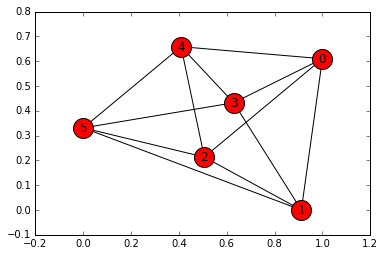

In [305]:
G5 = nx.octahedral_graph()
sum = 0
for i in G5.degree([0]).values():
 sum = i+1
print "\n El grado del grafo  es " + str(sum)
nx.draw_networkx(G5, node_color='r', node_size=400)

* **Grafos regulares**. Si todos los vértices de un grafo tienen el mismo grado, se dirá que dicho grafo es regular.

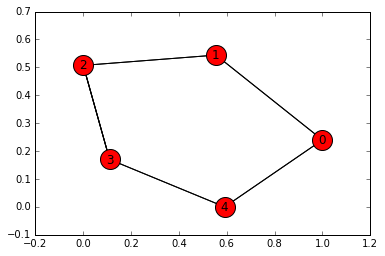

In [258]:
G5 =nx.chordal_cycle_graph(5)
nx.draw_networkx(G5, node_color='r', node_size=400)

* **Grado de entrada y de salida** Si G=(V,E) es un digrafo, y dado v Є V, se llama:  
 1º) grado de entrada(o positivo) de v, $\ gr_e$(v),, al número de arcos de E que confluyen en v(o sea, que tienen a v por extremo);  
 2º)grado de salida(o negativo) de v,$\ gr_5$(v),al numero de arcos de E que parten de v(o sea, que tienen a v por origen). Obviamente es gr(v)=$\ gr_e$(v)+$\ gr_5$(v). En un digrafo G=(V,E), sus grados de entrada y de salida(de G) son iguales, entre sí, e iguales al número total de arcos:
 





\begin{equation*}
gr_e V(G) =  \sum_{v \in V}gr_e(v)= |E|
\end{equation*}

\begin{equation*}
gr_5 V(G) =  \sum_{v \in V}gr_5(v)= |E|
\end{equation*}

\begin{equation*}
gr_e V(G) =  \sum_{v \in V}gr_e(v)= |E|
\end{equation*}

\begin{equation*}
gr_5 V(G) =  \sum_{v \in V}gr_5(v)= |E|
\end{equation*}


## Grafos bipartidos. Emparejamientos

* El grafo G=(V,E), GND es **bipartido** si existe una particíon de V en dos conjuntos $\ V_1$, $\ V_2$ tal que $\ V_1 \cup V_2 = V, V_1 \cap V_2 = \emptyset $, ∀{$\ v_i$,$\ v_j$} Є E,$\ v_i$ Є $\ v_1$,$\ v_j$ Є $\ v_2$  
  * Es necesario que toda arista tenga un extremo en $\ V_1$ y otro en $\ V_2$
  * No pueden existir aristas entre vértices de $\ V_1$ ni entre vértices de $\ V_2$
  * Para comprobra si un grafo es bipartido se consideran dos etiquetos, por ejemplo 1 y 2. Se elige un vértice y se le asigna una etiqueta, por ejemplo la 1 y a todos sus vértices adyacentes la 2. Se sigue el proceso hasta etiquetar todos los vértices. Se comprueba si todos los vértices adyacentes tiene etiquetas distintas.  
  Ejemplo:

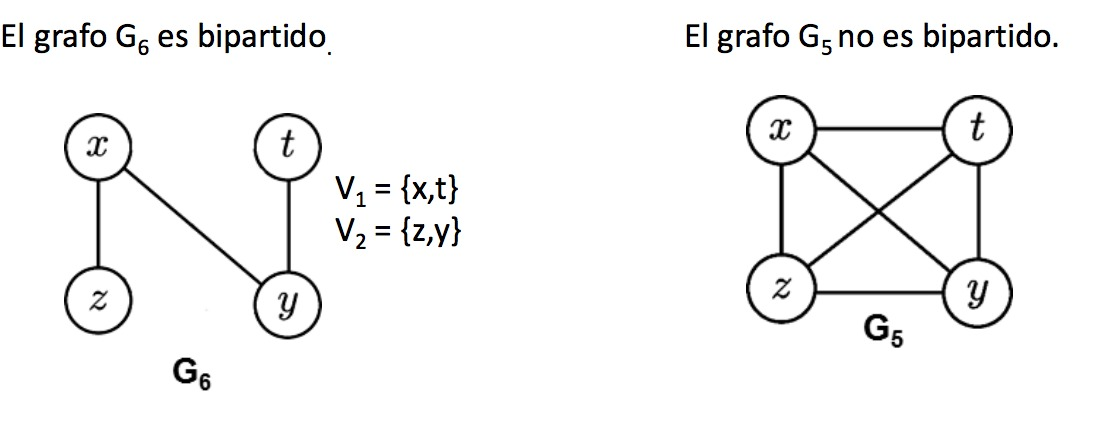

In [333]:
Image(filename='GrafoBipartido.jpeg', width=550, height=250)

* El grafo G=(V,E), GND, es **bipartido completo** si cada vértice de $\ V_1$ esa relacionado con cada vértice de $\ V_2$. Denotaremos por $\ k_m,_n$ al grafo GND, bipartido completo y simpe con |$\ V_1$|=n y |$\ V_2$|=m.

* **Emparejamiento.** G=(U $\cup$ V,E), se llama emparejamiento a todo conjunto de aristas M C E tal que dos cualesquiera de las aristas de M no tienen ningún vértice en común. Se dice que un emparejamiento M es:
  * Emparejamiento máximo si no hay ningún otro emparejamiento de G que tenga mayor número de aristas que él
  * Emparejamiento completo, para U(igual sería para V), si todos los vértices de U son extremo de una arista de M; esto es, si |M| = |U|.
  * Emparejamiento perfecto si acontece que |M|=|U|=|V|.

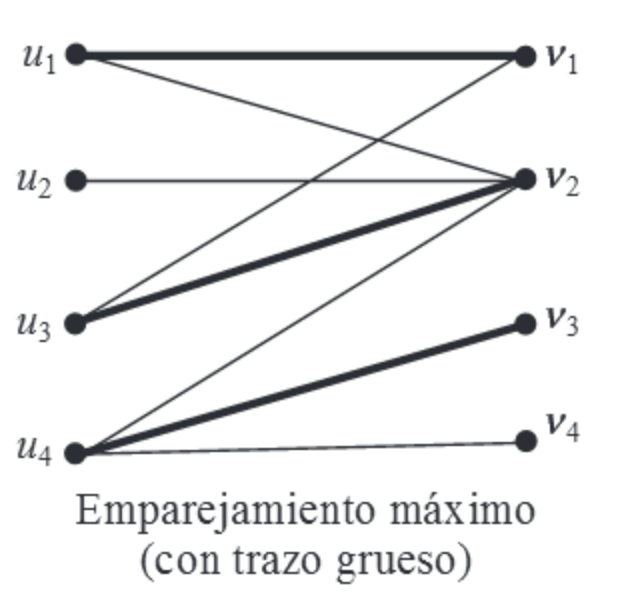

In [311]:
Image(filename='Emparejamiento.png', width=250, height=250)

* **Teorema de Hall**(caracterización de los emparejamientos completos). Un grafo bipartido G=(U $\cup$ V,E) admite algún emparejamiento completo(para U) si, y sólo si, se cumple la siguiente condición(de Hall):
    

\begin{equation*}
 |Ad(C)|=>|C| ∀C U c U   \begin{cases}
    &\text{ad(c)(Adyacencia de C es) }\\
    &\text{v Є V|uv Є para algún u Є C }\\
  \end{cases}
\end{equation*}
